In [1]:
# !pip install pandas
import pandas as pd

# arquivo muito grande para fazer upload no github
# uri = https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr/versions/1?resource=download
df = pd.read_csv('imdb-reviews-pt-br.csv')
df.head

<bound method NDFrame.head of           id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1      Este é um exemplo do

In [2]:
# !pip install scikit-learn
from sklearn.model_selection import train_test_split

# divide os dados para treino do modelo e teste desse modelo
treino, teste, classe_treino, classe_teste = train_test_split(df.text_pt, df.sentiment, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
# esse modelo vai calcular a possibilidade de determinada classificação - positivo ou negativo

# modelo
regressao_logistica = LogisticRegression()
# treino do modelo com os dados
regressao_logistica.fit(treino, classe_treino)
# teste da qualidade do modelo
acuracia = regressao_logistica.score(teste, classe_teste)
# por motivos óbvios, o modelo não é capaz de interpretar o texto

In [4]:
# padronizando a coluna Sentiment
classificacao = df['sentiment'].replace(['neg', 'pos'], [0,1])
df['classificacao'] = classificacao

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# vetorizar o corpus em um vetor bag of words
vetorizar = CountVectorizer(lowercase=False, max_features=50)
    # max_features define o tamanho da matriz escolhendo só as n palavras que mais aparecem
bag_of_words = vetorizar.fit_transform(df.text_pt)

dicionario = vetorizar.get_feature_names_out()

# recebe uma matriz esparsa - de zeros e NaN - e retorna um DF
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=dicionario)

In [6]:
def classificar_txt(texto, coluna_txt, coluna_classe):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_txt])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classe], random_state=42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

classificar_txt(df, 'text_pt', 'classificacao')
    

0.6583097452486858

In [15]:
#!pip install wordcloud

#%matplotlib inline
from wordcloud import WordCloud

# junta todas as frases - separadas como valores - numa array, para, com o join, juntar todas e separá-las pelo " "
todas_palavras = " ".join([texto for texto in df.text_pt])

nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    # collocations = tira os bigramas ("palavras duplas", como 'este filme') e filtra só palavras "soltas"

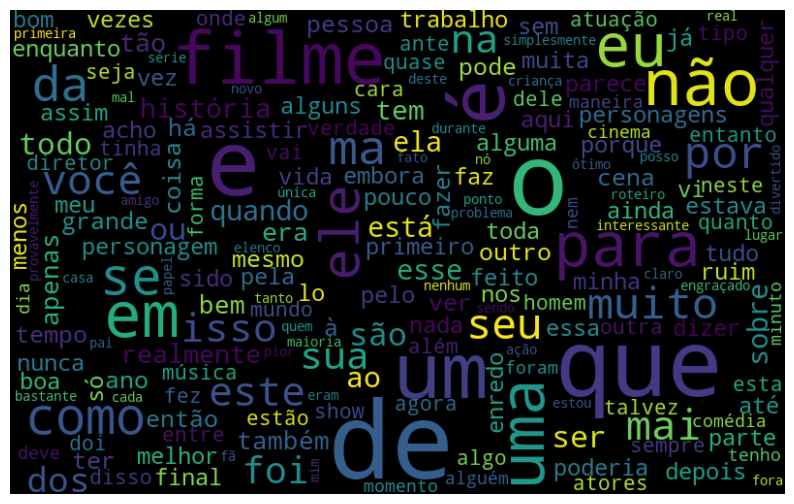

In [16]:
import matplotlib.pyplot as plt

# plotando as palavras mais frequentes para entender melhor o conjunto de dados
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
    # interpolation = melhora a qualidade
plt.axis("off")
plt.show()